# Web Scraping Using Python - Mamata Garanayak

Imagine you have to pull a large amount of data from websites and you want to do it as quickly as possible. How would you do it without manually going to each website and getting the data? Well, “Web Scraping” is the answer. Web Scraping just makes this job easier and faster. 

## Why Web Scraping
Web scraping is used to collect large information from websites. But why does someone have to collect such large data from websites? To know about this, let’s look at the applications of web scraping:

    Price Comparison: 
    Services such as ParseHub use web scraping to collect data from online shopping websites and use it to 
    compare the prices of products.
    
    Email address gathering: 
    Many companies that use email as a medium for marketing, use web scraping to collect email ID and then send 
    bulk emails.
    
    Social Media Scraping: 
    Web scraping is used to collect data from Social Media websites such as Twitter to find out what’s trending.
    
    Research and Development: 
    Web scraping is used to collect a large set of data (Statistics, General Information, Temperature, etc.) from websites, which are analyzed and used to carry out Surveys or for R&D.
    
    Job listings: 
    Details regarding job openings, interviews are collected from different websites and then listed in one place so that it is easily accessible to the user.

## How does Web Scraping work?

When you run the code for web scraping, a request is sent to the URL that you have mentioned. As a response to the request, the server sends the data and allows you to read the HTML or XML page. The code then, parses the HTML or XML page, finds the data and extracts it. 

To extract data using web scraping with python, you need to follow these basic steps:

    Find the URL that you want to scrape
    Inspecting the Page
    Find the data you want to extract
    Write the code
    Run the code and extract the data
    Store the data in the required format 

## Libraries used for Web Scraping 
As we know, Python is used for various applications and there are different libraries for different purposes. In our further demonstration, we will be using the following libraries:

    Selenium:  
    Selenium is a web testing library. It is used to automate browser activities.
    
    BeautifulSoup: 
    Soup is a Python package for parsing HTML and XML documents. It creates parse trees that is helpful to 
    extract the data easily.
    
    Pandas: 
    Pandas is a library used for data manipulation and analysis. It is used to extract the data and store it 
    in the desired format. 

# Scraping "FLIPKART" Website

### Step 1: Find the URL that you want to scrape

For this example, we are going scrape Flipkart website to extract the Information about Samsung mobiles. 

The URL for this page is https://www.flipkart.com/search?q=samsung+mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_0_2&otracker1=AS_QueryStore_HistoryAutoSuggest_0_2&as-pos=0&as-type=HISTORY&as-searchtext=sa"

### Step 2: Inspecting the Page

The data is usually nested in tags. So, we inspect the page to see, under which tag the data we want to scrape is nested. To inspect the page, just right click on the element and click on “Inspect”.

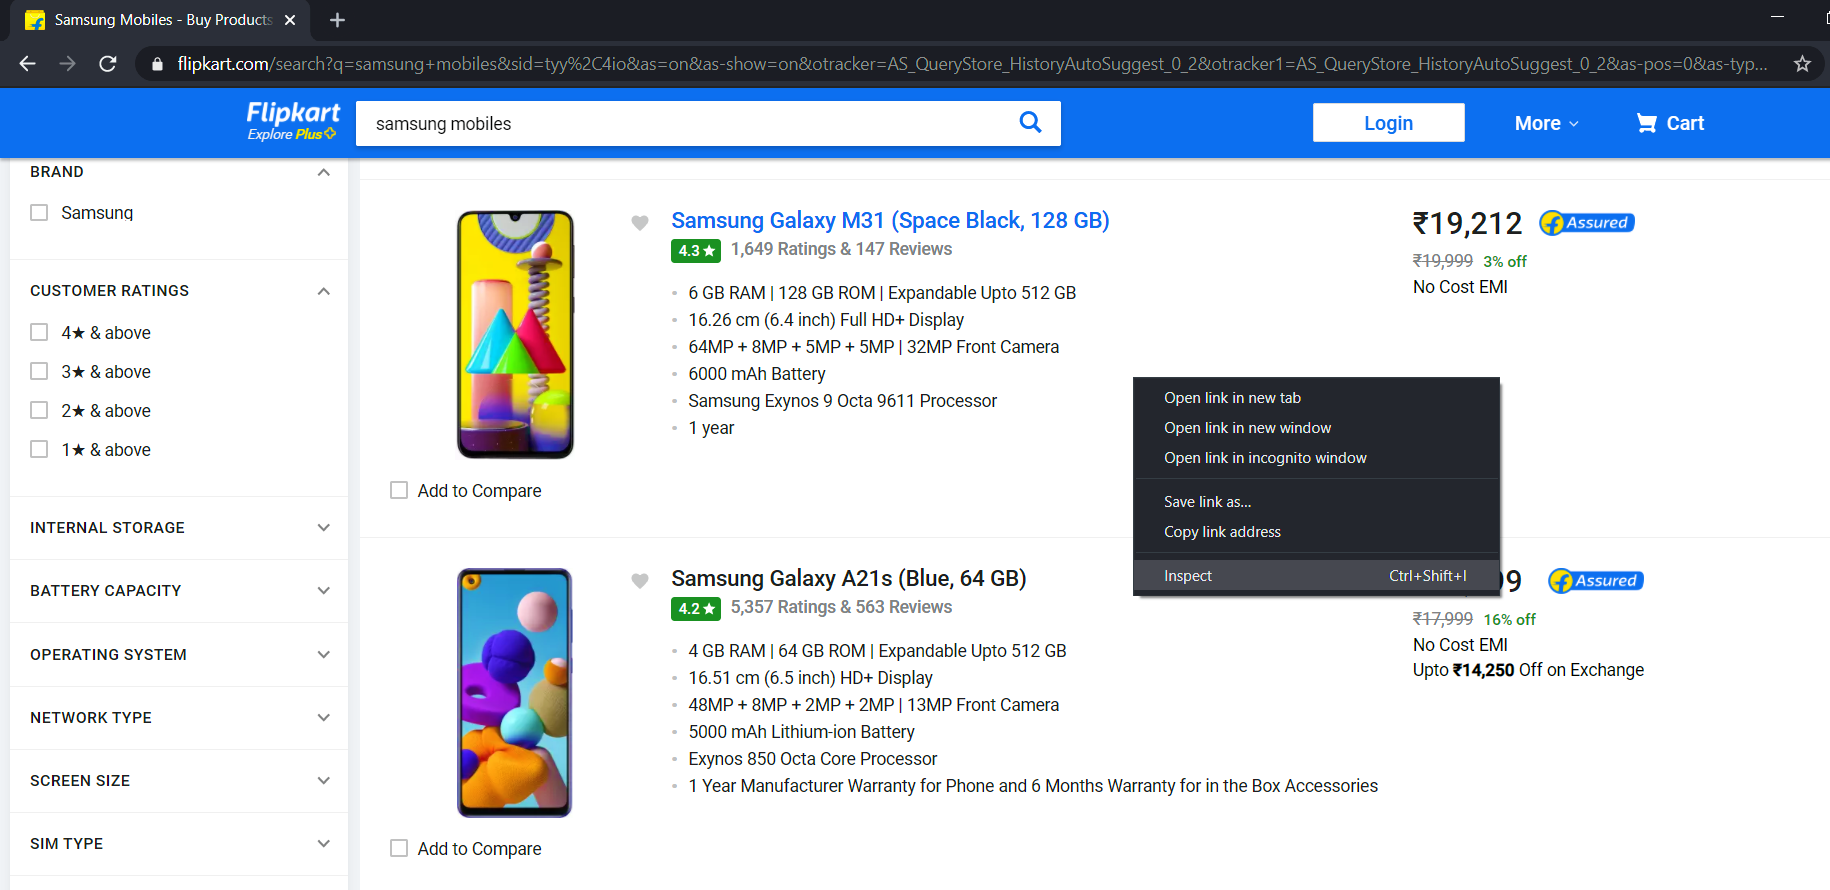

### When you click on the “Inspect” tab, you will see a “Browser Inspector Box” open.

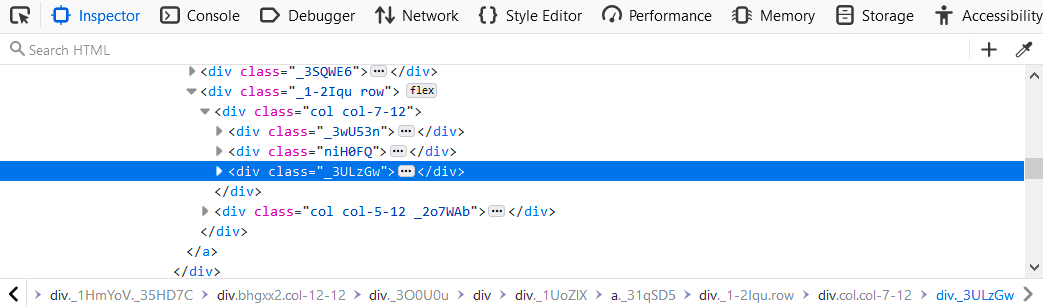

## Step 3: Find the data you want to extract

Let’s extract the Price, Name, and Rating which is nested in the “div” tag respectively.

## Step 4: Write the code

First, let’s create a Python file with .py extension.

### Install All the Required Libraries

In [2]:
import pandas as pd
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

In [3]:
my_url="https://www.flipkart.com/search?q=samsung+mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_0_2&otracker1=AS_QueryStore_HistoryAutoSuggest_0_2&as-pos=0&as-type=HISTORY&as-searchtext=sa"

In [4]:
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()
page_soup = soup(page_html, "html.parser")

You can use the find_all() method of soup to extract useful html tags within a webpage. Examples of useful tags include < a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells. The code below shows how to extract all the hyperlinks within the webpage.

In [5]:
containers = page_soup.findAll("div", { "class": "_3O0U0u"})
print(len(containers))

24


In [6]:
print(soup.prettify(containers[0]))

<div class="_3O0U0u">
 <div data-id="MOBFPNPS6QGTKBQB" style="width:100%">
  <div class="_1UoZlX">
   <a class="_31qSD5" href="/samsung-galaxy-m31-space-black-128-gb/p/itmeb29fb2c00580?pid=MOBFPNPS6QGTKBQB&amp;lid=LSTMOBFPNPS6QGTKBQBWLJMAO&amp;marketplace=FLIPKART&amp;srno=s_1_1&amp;otracker=AS_QueryStore_HistoryAutoSuggest_0_2&amp;otracker1=AS_QueryStore_HistoryAutoSuggest_0_2&amp;fm=organic&amp;iid=3114eed4-32dc-45e6-9559-5bfbff40c68d.MOBFPNPS6QGTKBQB.SEARCH&amp;ssid=c4oxafmcsw0000001599206214916&amp;qH=0258c7d48242959a" rel="noopener noreferrer" target="_blank">
    <div class="_3SQWE6">
     <div class="_1OCn9C">
      <div>
       <div class="_3BTv9X" style="height:200px;width:200px">
        <img alt="Samsung Galaxy M31 (Space Black, 128 GB)" class="_1Nyybr" src="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/placeholder_9951d0.svg"/>
       </div>
      </div>
     </div>
     <div class="_2lesQu">
      <div class="_1O_CiZ">
       <span class="_1iHA1p">
        <div class="_

In [7]:
container = containers[0]
print(container.div.img["alt"])

Samsung Galaxy M31 (Space Black, 128 GB)


In [8]:
price = container.findAll("div", {"class": "col col-5-12 _2o7WAb"})
print(price[0].text)

₹19,212₹19,9993% offNo Cost EMI


In [9]:
ratings = container.findAll("div", {"class": "niH0FQ"})
print(ratings[0].text)

4.31,650 Ratings & 148 Reviews


In [10]:
filename = "products.csv"
f = open(filename, "w")

In [11]:
headers = "Product_Name, Pricing, Ratings \n"
f.write(headers)

32

In [12]:
for container in containers:
    product_name = container.div.img["alt"]
    price_container = container.findAll("div", {"class": "col col-5-12 _2o7WAb"})
    price = price_container[0].text.strip()

    rating_container = container.findAll("div", {"class": "niH0FQ"})
    rating = rating_container[0].text

    print("Product_Name:"+ product_name)
    print("Price: " + price)
    print("Ratings:" + rating)

    #String parsing
    trim_price=''.join(price.split(','))
    rm_rupee = trim_price.split('₹')
    add_rs_price = "Rs."+rm_rupee[1]
    split_price = add_rs_price.split('E')
    final_price = split_price[0]

    split_rating = rating.split(" ")
    final_rating = split_rating[0]

    print(product_name.replace("," ,"|") +"," + final_price +"," + final_rating + "\n")
    f.write(product_name.replace("," ,"|") +"," + final_price +"," + final_rating + "\n")
f.close()

Product_Name:Samsung Galaxy M31 (Space Black, 128 GB)
Price: ₹19,212₹19,9993% offNo Cost EMI
Ratings:4.31,650 Ratings & 148 Reviews
Samsung Galaxy M31 (Space Black| 128 GB),Rs.19212,4.31,650

Product_Name:Samsung Galaxy A21s (Blue, 64 GB)
Price: ₹14,999₹17,99916% offNo Cost EMIUpto ₹14,250 Off on Exchange
Ratings:4.25,362 Ratings & 564 Reviews
Samsung Galaxy A21s (Blue| 64 GB),Rs.14999,4.25,362

Product_Name:Samsung Galaxy A21s (Black, 64 GB)
Price: ₹14,999₹17,99916% offNo Cost EMIUpto ₹14,250 Off on Exchange
Ratings:4.25,362 Ratings & 564 Reviews
Samsung Galaxy A21s (Black| 64 GB),Rs.14999,4.25,362

Product_Name:Samsung Metro 313 Dual Sim
Price: ₹2,130₹2,3408% offNo Cost EMI
Ratings:4.216,650 Ratings & 1,928 Reviews
Samsung Metro 313 Dual Sim,Rs.2130,4.216,650

Product_Name:Samsung Metro 313 Dual Sim
Price: ₹2,130₹2,3408% offNo Cost EMI
Ratings:4.210,090 Ratings & 1,104 Reviews
Samsung Metro 313 Dual Sim,Rs.2130,4.210,090

Product_Name:Samsung Galaxy A21s (White, 64 GB)
Price: ₹14,999

#### Now You Will Get A CSV File on your Folder named "Products.csv" with Information that You used for Web Scraping

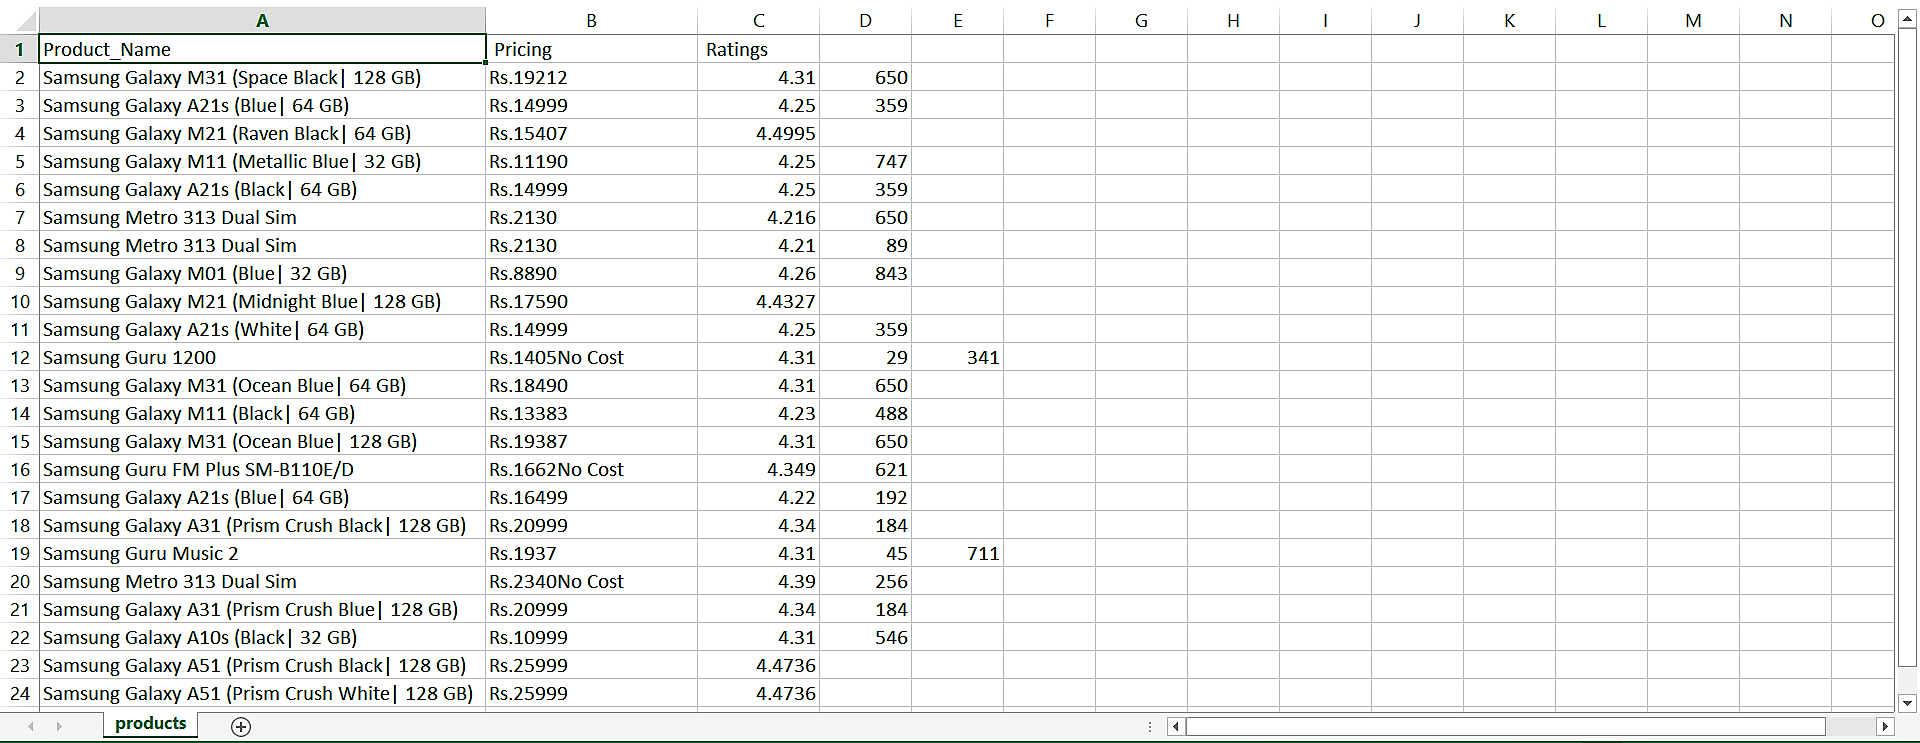